<a href="https://colab.research.google.com/github/srujayreddyv/HandWritingRetrieval/blob/main/HW_Retrieval_Srujay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Mounts Google Drive in a Colab environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.0 Data Preprocessing

In [2]:
# Library Importing...
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

import os
import shutil



Text(0.5, 1.0, 'Original Image')

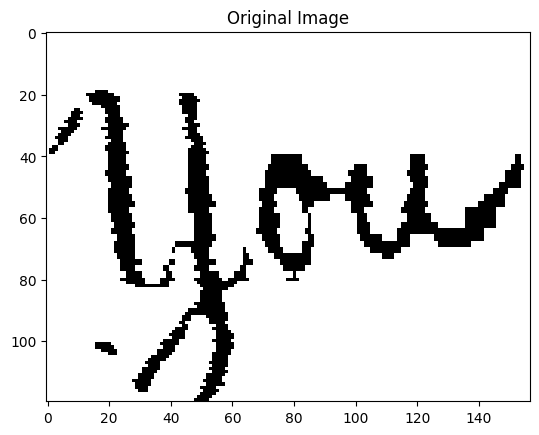

In [3]:
# Image reading & showing...
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/data/word_images_normalized/270-04-05.png')

plt.imshow(img)
#plt.axis('off')
plt.title('Original Image')

In [4]:
img_path = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/data/word_images_normalized/'
img_list = [img_path + f for f in os.listdir(img_path)]
img_list.sort()
all_widths = []
all_heights = []
for img in img_list:
    img = cv.imread(img)
    h, w, _ = img.shape
    all_widths.append(w)
    all_heights.append(h)
print(np.max(all_widths))
print(np.max(all_heights))


645
120


In [ ]:
# Create a new directory for the padded images
padded_img_path = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/padded_images/'
os.makedirs(padded_img_path, exist_ok=True)

max_width = np.max(all_widths)
max_height = np.max(all_heights)

for i, img in enumerate(img_list):
    img = cv.imread(img)
    h, w, _ = img.shape
    if w < max_width:
        img = cv.copyMakeBorder(img, 0, 0, 0, max_width - w, cv.BORDER_CONSTANT, value=0)
    if h < max_height:
        img = cv.copyMakeBorder(img, 0, max_height - h, 0, 0, cv.BORDER_CONSTANT, value=0)
    output_filename = os.path.basename(img_list[i])  # Get the original filename
    output_path = os.path.join(padded_img_path, output_filename)
    cv.imwrite(output_path, img)


Text(0.5, 1.0, 'Original Image')

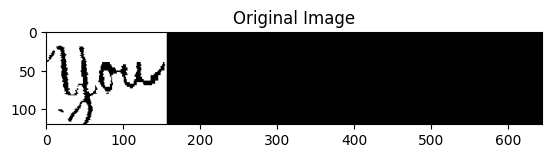

In [4]:
# Image reading & showing...
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/padded_images/270-04-05.png')

plt.imshow(img)
#plt.axis('off')
plt.title('Original Image')

In [ ]:
# Create a new directory for the padded images
# padded_img_path = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/padded_images/'
# os.makedirs(padded_img_path, exist_ok=True)

# Function to convert a grayscale image to a binary vector
def grayscale_image_to_binary_vector(image):
    # Flatten the grayscale image to a 1D binary vector
    binary_vector = image.flatten()
    return binary_vector

# Directory to save the binary vectors
binary_vector_path = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/binary_vectors/'
os.makedirs(binary_vector_path, exist_ok=True)

# Process each padded image
for img_file in os.listdir(padded_img_path):
    if img_file.endswith('.png'):
        # Read the padded image as grayscale
        img = cv.imread(os.path.join(padded_img_path, img_file), cv.IMREAD_GRAYSCALE)

        # Convert the grayscale image to a binary vector
        binary_vector = grayscale_image_to_binary_vector(img)

        # Save the binary vector to a file
        binary_vector_file = os.path.join(binary_vector_path, img_file.replace('.png', '.txt'))
        np.savetxt(binary_vector_file, binary_vector, fmt='%d', delimiter=' ')


In [5]:
# Define the file path
file_path = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/binary_vectors/270-04-05.txt'

# Use the !cat command to print the file contents
!cat "$file_path"

255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
255
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
import os
import shutil

# Define paths to your binary vectors folder and the new folder
binary_vectors_folder = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/binary_vectors/'
new_folder = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/new_folder/'
os.makedirs(new_folder, exist_ok=True)

# Read the labels from the labels file
labels = set()
with open('/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/ground_truth/word_labels.txt', 'r') as labels_file:
    for line in labels_file:
        label = line.strip().split(' ', 1)[0]  # Extract the label from each line
        labels.add(label)

# List binary vector files in the original folder
binary_vector_files = os.listdir(binary_vectors_folder)

# Iterate through the binary vector files
for filename in binary_vector_files:
    # Extract the label from the file name
    label = os.path.splitext(filename)[0]
    if label in labels:
        # Copy the file to the new folder
        source_path = os.path.join(binary_vectors_folder, filename)
        destination_path = os.path.join(new_folder, filename)
        shutil.copy(source_path, destination_path)
        print(f"Copied {filename} to the new folder.")

# Print the number of files copied
num_files_copied = len(os.listdir(new_folder))
print(f"Number of files copied: {num_files_copied}")


Copied 275-35-09.txt to the new folder.
Copied 276-02-01.txt to the new folder.
Copied 276-02-02.txt to the new folder.
Copied 276-02-03.txt to the new folder.
Copied 276-02-04.txt to the new folder.
Copied 276-02-05.txt to the new folder.
Copied 276-02-06.txt to the new folder.
Copied 276-02-07.txt to the new folder.
Copied 276-04-01.txt to the new folder.
Copied 276-04-02.txt to the new folder.
Copied 276-04-03.txt to the new folder.
Copied 276-04-04.txt to the new folder.
Copied 276-04-05.txt to the new folder.
Copied 276-04-06.txt to the new folder.
Copied 276-04-07.txt to the new folder.
Copied 276-05-01.txt to the new folder.
Copied 276-05-02.txt to the new folder.
Copied 276-05-03.txt to the new folder.
Copied 276-05-04.txt to the new folder.
Copied 276-05-05.txt to the new folder.
Copied 276-05-06.txt to the new folder.
Copied 276-06-01.txt to the new folder.
Copied 276-06-02.txt to the new folder.
Copied 276-06-03.txt to the new folder.
Copied 276-06-04.txt to the new folder.


# 3.0 Normalization

In [6]:
import os
import numpy as np
from sklearn.preprocessing import normalize

# Directory to save the binary vectors
binary_vector_path = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/new_folder/'
os.makedirs(binary_vector_path, exist_ok=True)

# Function to read and normalize binary vectors
def read_and_normalize_binary_vectors(binary_vector_path):
    binary_vectors = []
    file_list = os.listdir(binary_vector_path)

    for file in file_list:
        if file.endswith('.txt'):
            # Load the binary vector from the text file
            binary_vector = np.loadtxt(os.path.join(binary_vector_path, file), dtype=int)

            # Normalize the binary vector
            normalized_vector = normalize(binary_vector.reshape(1, -1))

            binary_vectors.append(normalized_vector)

    # Convert the list of normalized vectors to a NumPy array
    binary_vectors_array = np.vstack(binary_vectors)

    return binary_vectors_array, file_list

# Read and normalize the binary vectors and store them in a NumPy array
binary_vectors_array, file_list = read_and_normalize_binary_vectors(binary_vector_path)


In [7]:
print("Binary Vectors (First 5 Samples):")
for binary_vector in binary_vectors_array[:5]:
    print(binary_vector)

print("File List (First 5 Samples):")
for filename in file_list[:5]:
    print(filename)

Binary Vectors (First 5 Samples):
[0.00635693 0.00635693 0.00635693 ... 0.         0.         0.        ]
[0.0122859 0.0122859 0.0122859 ... 0.        0.        0.       ]
[0.01343038 0.01343038 0.01343038 ... 0.         0.         0.        ]
[0.00577043 0.00577043 0.00577043 ... 0.         0.         0.        ]
[0.00815627 0.00815627 0.00815627 ... 0.         0.         0.        ]
File List (First 5 Samples):
303-11-10.txt
303-12-01.txt
303-12-02.txt
303-12-03.txt
303-12-04.txt


In [8]:
import os

# Set the path to the folder you want to count text files in
folder_path = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/new_folder/'

# Initialize a counter for text files
txt_count = 0

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        # Check for text (txt) file extensions
        txt_count += 1

# Print the count of text files
print("Text Files:", txt_count)


Text Files: 4894


In [9]:
# Set the path to the file
file_path = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/ground_truth/word_labels.txt'

# Initialize a line counter
line_count = 0

# Open the file and count the lines
with open(file_path, 'r') as file:
    for line in file:
        line_count += 1

# Print the line count
print("Number of Lines in the File:", line_count)


Number of Lines in the File: 4894


In [10]:
#print("Query Vector Shape:", query_vector.shape)
print("Binary Vectors Shape:", binary_vectors_array.shape)

Binary Vectors Shape: (4894, 77400)


In [11]:
# Define the path to your ground truth file
ground_truth_file = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/ground_truth/word_labels.txt'

# Read ground truth labels
ground_truth_labels = []
with open(ground_truth_file, 'r') as f:
    lines = f.read().splitlines()
    for line in lines:
        # Split the line into parts
        parts = line.split(' ', 1)
        if len(parts) == 2:
            _, label = parts
            ground_truth_labels.append(label)


# 4.0 Cosine Similarity

In [12]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarities between all pairs of vectors in the dataset
cosine_distances = 1 - cosine_similarity(binary_vectors_array)

# The resulting 'cosine_distances' is a 2D NumPy array where each element at position (i, j) represents the cosine distance
# between the i-th and j-th vectors. Diagonal elements (i == j) will be 0 as it's the distance between a vector and itself.

# You can access the cosine distance between any two vectors by indexing the 'cosine_distances' array.
# For example, cosine_distances[i][j] will give you the cosine distance between the i-th and j-th vectors.

# Now you have the cosine distances stored in a 2D array for further analysis or visualization.


In [14]:
# Print some of the cosine distances
num_samples = 5  # Number of cosine distances to print
for i in range(num_samples):
    for j in range(num_samples):
        print(f"Cosine Distance between vector {i} and vector {j}: {cosine_distances[i][j]}")


Cosine Distance between vector 0 and vector 0: -1.7763568394002505e-13
Cosine Distance between vector 0 and vector 1: 0.5278816728805599
Cosine Distance between vector 0 and vector 2: 0.5755104484975924
Cosine Distance between vector 0 and vector 3: 0.19299161179462143
Cosine Distance between vector 0 and vector 4: 0.30429215646575414
Cosine Distance between vector 1 and vector 0: 0.5278816728805599
Cosine Distance between vector 1 and vector 1: -3.3084646133829665e-14
Cosine Distance between vector 1 and vector 2: 0.14148225971014927
Cosine Distance between vector 1 and vector 3: 0.5706605480809108
Cosine Distance between vector 1 and vector 4: 0.38112069197677234
Cosine Distance between vector 2 and vector 0: 0.5755104484975924
Cosine Distance between vector 2 and vector 1: 0.14148225971014927
Cosine Distance between vector 2 and vector 2: -3.9968028886505635e-14
Cosine Distance between vector 2 and vector 3: 0.6048324507861453
Cosine Distance between vector 2 and vector 4: 0.4208523

In [17]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Iterate through the ground truth labels and cosine distances
average_precision_values = []

for i, query_label in enumerate(ground_truth_labels):
    # Get the cosine distances for the i-th query vector
    query_distances = cosine_distances[i]

    # Create a list to store the relevance scores for each result
    # In this case, you might consider a result relevant if it has the same label as the query
    relevance_scores = [1 if label == query_label else 0 for label in ground_truth_labels]

    # Calculate precision and recall values
    precision, recall, _ = precision_recall_curve(relevance_scores, -query_distances)

    # Calculate Average Precision (AP) for the current query
    average_precision = average_precision_score(relevance_scores, -query_distances)
    average_precision_values.append(average_precision)

# Calculate the Mean Average Precision (MAP) as the mean of all individual query APs
MAP = np.mean(average_precision_values)

# Print the MAP value
print("Mean Average Precision (MAP) for the dataset:", MAP)


Mean Average Precision (MAP) for the dataset: 0.3114319259338441


In [21]:
# Define the index of the data point you want to query
query_index = 264  # Replace with the index of the data point you want to query

# Number of closest data points to retrieve
top_k = 10

# Get the cosine distances for the query data point
query_distances = cosine_distances[query_index]

# Sort the distances and get the indices of the closest data points
closest_indices = np.argsort(query_distances)[:top_k]

# Print the query data point and the top 5 closest data points
print("Query Data Point:")
print(f"Label: {ground_truth_labels[query_index]}")
print(f"Cosine Distances: {query_distances}")

print("\nTop 10 Closest Data Points:")
for index in closest_indices:
    print(f"Label: {ground_truth_labels[index]}")
    print(f"Cosine Distance: {query_distances[index]}")


Query Data Point:
Label: d-o
Cosine Distances: [0.38228272 0.27470845 0.32385437 ... 0.15140344 0.4391105  0.40655764]

Top 10 Closest Data Points:
Label: d-o
Cosine Distance: 1.1657341758564144e-13
Label: o-r-s_mi
Cosine Distance: 0.045102731461981294
Label: a-n-y
Cosine Distance: 0.05328777315483302
Label: H-o-g-g-s
Cosine Distance: 0.05509417581635956
Label: l-e-a-v-e
Cosine Distance: 0.05590934198609143
Label: m-a-r-c-h
Cosine Distance: 0.05628044174575364
Label: C-l-o-t-h-e-s
Cosine Distance: 0.056608082863565445
Label: g-l-a-d
Cosine Distance: 0.0567882471914698
Label: u-n-d-e-r
Cosine Distance: 0.05694799905125025
Label: D-r-u-m-s_cm
Cosine Distance: 0.05702428174819274


# 5.0 L2 Norm

In [22]:
import numpy as np

# Define the percentage of the dataset to use
subset_percentage = 0.15  # Adjust as needed

# Calculate the number of data points to use in the subset
num_data_points = len(binary_vectors_array)
num_data_points_to_use = int(subset_percentage * num_data_points)

# Randomly select data points to use for the subset
subset_indices = np.random.choice(num_data_points, num_data_points_to_use, replace=False)
subset_binary_vectors = binary_vectors_array[subset_indices]
subset_ground_truth_labels = [ground_truth_labels[i] for i in subset_indices]

# Calculate L2 distances for the subset
l2_distances_matrix_subset = np.zeros((num_data_points_to_use, num_data_points_to_use))

# Calculate L2 distances for all pairs of data points in the subset
for i in range(num_data_points_to_use):
    for j in range(num_data_points_to_use):
        l2_distances_matrix_subset[i][j] = np.linalg.norm(subset_binary_vectors[i] - subset_binary_vectors[j])

# Now, l2_distances_matrix is a 2D array where each element at position (i, j) represents the L2 distance
# between the i-th and j-th data points in the subset.

# Access L2 distance between any two data points in the subset
i, j = 0, 1  # Replace with the indices of the data points you want to compare
l2_distance_ij = l2_distances_matrix_subset[i][j]


In [23]:
# Choose the number of distances you want to print
num_distances_to_print = 5

# Iterate to print the selected number of distances
for i in range(num_distances_to_print):
    for j in range(num_distances_to_print):
        print(f"L2 Distance between data point {i} and data point {j}: {l2_distances_matrix_subset[i][j]}")


L2 Distance between data point 0 and data point 0: 0.0
L2 Distance between data point 0 and data point 1: 1.2000900618611934
L2 Distance between data point 0 and data point 2: 0.5656366949970777
L2 Distance between data point 0 and data point 3: 0.7586734737686476
L2 Distance between data point 0 and data point 4: 0.7738545184057166
L2 Distance between data point 1 and data point 0: 1.2000900618611934
L2 Distance between data point 1 and data point 1: 0.0
L2 Distance between data point 1 and data point 2: 1.2269146446218742
L2 Distance between data point 1 and data point 3: 1.12122455363071
L2 Distance between data point 1 and data point 4: 1.1373821530477723
L2 Distance between data point 2 and data point 0: 0.5656366949970777
L2 Distance between data point 2 and data point 1: 1.2269146446218742
L2 Distance between data point 2 and data point 2: 0.0
L2 Distance between data point 2 and data point 3: 0.8369678900374781
L2 Distance between data point 2 and data point 4: 0.83708464319769

In [24]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Initialize a list to store Average Precision (AP) values for each data point in the subset
average_precision_values = []

# Initialize a variable to store the total recall
total_recall = 0.0

# Iterate through the ground truth labels and L2 distances for the subset
for i, query_label in enumerate(subset_ground_truth_labels):
    # Get the L2 distances for the i-th query vector
    query_distances = l2_distances_matrix_subset[i]

    # Create a list to store the relevance scores for each result in the subset
    # In this case, you might consider a result relevant if it has the same label as the query
    relevance_scores = [1 if label == query_label else 0 for label in subset_ground_truth_labels]

    # Calculate precision and recall values
    precision, recall, _ = precision_recall_curve(relevance_scores, -query_distances)

    # Calculate Average Precision (AP) for the current query
    average_precision = average_precision_score(relevance_scores, -query_distances)
    average_precision_values.append(average_precision)

    # Accumulate the recall value
    total_recall += recall.mean()

# Calculate the Mean Average Precision (MAP) as the mean of all individual query APs
MAP = np.mean(average_precision_values)

# Calculate the Mean Recall (MRecall) as the mean of accumulated recall values
MRecall = total_recall / len(subset_ground_truth_labels)

# Print the MAP and MRecall values
print("Mean Average Precision (MAP) for the subset of the dataset:", MAP)
print("Mean Recall (MRecall) for the subset of the dataset:", MRecall)


Mean Average Precision (MAP) for the subset of the dataset: 0.5246844500066226
Mean Recall (MRecall) for the subset of the dataset: 0.7506343826342283


In [39]:
# Define the index of the data point you want to query
query_index = 21  # Replace with the index of the data point you want to query

# Number of closest data points to retrieve
top_k = 10

# Get the L2 distances for the query data point
query_vector = subset_binary_vectors[query_index]  # Use the subset data
l2_distances = np.linalg.norm(subset_binary_vectors - query_vector, axis=1)

# Sort the distances and get the indices of the closest data points
closest_indices = np.argsort(l2_distances)[:top_k]

# Print the query data point and the top-k closest data points
print("Query Data Point:")
print(f"Label: {subset_ground_truth_labels[query_index]}")
print(f"L2 Distances: {l2_distances[query_index]}")

print(f"\nTop {top_k} Closest Data Points:")
for index in closest_indices:
    print(f"Label: {subset_ground_truth_labels[index]}")
    print(f"L2 Distance: {l2_distances[index]}")


Query Data Point:
Label: t-o
L2 Distances: 0.0

Top 10 Closest Data Points:
Label: t-o
L2 Distance: 0.0
Label: T-o
L2 Distance: 0.4018648490959157
Label: t-h-o-s-e
L2 Distance: 0.41272989802840987
Label: n-e-c-e-s_s-s-a-r-i-e-s
L2 Distance: 0.42213313061367674
Label: a-t
L2 Distance: 0.4238384694908548
Label: b-e
L2 Distance: 0.4283414292480474
Label: c-a-n
L2 Distance: 0.4323604430595629
Label: A-r-m-s
L2 Distance: 0.4456172648703772
Label: p-a-r-t-i-c-u-l-a-r
L2 Distance: 0.4500375366987378
Label: I
L2 Distance: 0.4516357262168649


# 6.0 Dynamic Time Wrapping

# KNN

# Remove later

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import statistics
import matplotlib.pyplot as plt
import sys

# Computes Precision, Recall and Average Precision.
# For that, it is necessary the ordered set of relevant and non-relevant results
# and the total number of relevant documents in the colection.
def computeAvP(set, numTotalRelevant, precision, recall, averagePrecision):
    characters = list(set)
    totalRelevantAlreadyFound = 0

    # For each document result
    for idx, char in enumerate(characters):
        if (char.upper() == "R"):
            totalRelevantAlreadyFound += 1
            averagePrecision = averagePrecision + totalRelevantAlreadyFound / (idx + 1)

        precision.append(totalRelevantAlreadyFound / (idx + 1))
        recall.append(totalRelevantAlreadyFound / numTotalRelevant)

    averagePrecision = averagePrecision / totalRelevantAlreadyFound

    print("\nSET:")
    print(set)
    print("\nPRECISION:")
    print(precision)
    print("\nRECALL:")
    print(recall)
    print("\nAVERAGE PRECISION:")
    print(averagePrecision)
    print("")
    return averagePrecision


# Plots Precision-Recall curves for one or more query.
def plotMultiplePrecisionRecallCurve(precision, recall):
    _, ax = plt.subplots(figsize=(7, 8))
    colors = ["navy", "darkorange", "teal", "red", "bisque", "olive", "lavender"]

    for idx, prec in enumerate(precision):
        disp = PrecisionRecallDisplay(precision[idx], recall[idx])
        label = "Precision-recall for query #" + str(idx+1)
        disp.plot(ax=ax, name=label, color=colors[idx])

    plt.legend(loc='lower right')
    plt.savefig('precisionRecall.pdf')


# Computes Mean Average Precision.
def computeMAP(avpSet):
    MAP = statistics.mean(avpSet)
    print("\nMAP:")
    print(MAP)


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a dataset of binary vectors 'binary_vectors'
# 'binary_vectors' is a list of binary vectors, each normalized and flattened.
# Choose the binary vector for comparison (query vector)
query_vector_index = 8  # Change this to select a different query vector

# Convert binary_vectors to a NumPy array
binary_vectors = np.array(binary_vectors)

# Ensure that query_vector is a 1D array
query_vector = binary_vectors[query_vector_index]

# Reshape query_vector to a 2D array before calculating cosine similarities
query_vector = query_vector.reshape(1, -1)

# Calculate cosine similarities between the query vector and all other vectors
cosine_similarities = cosine_similarity(query_vector, binary_vectors)

# The resulting cosine_similarities is a 2D NumPy array where each row corresponds to the similarity
# of the query vector with all other vectors. The first row is the similarity of the query vector with itself.

# Now you can access the cosine distances for the query vector with other vectors.
# For example, cosine_similarities[0] will give you an array of similarities, where the first element is the similarity with itself.

# Check how many of the vectors have the same label as the query vector
query_label = ground_truth_labels[query_vector_index]  # Assuming you have ground truth labels
same_label_count = np.count_nonzero(ground_truth_labels == query_label)

print("Number of vectors with the same label as the query vector:", same_label_count)


IndexError: ignored


No data points to calculate MAP.


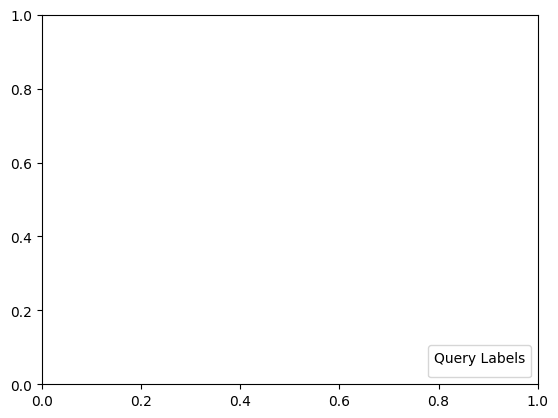

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
import statistics
import matplotlib.pyplot as plt
import sys

# Function to compute Average Precision (AvP) using ground truth data
def computeAvP(set, numTotalRelevant, ground_truth, precision, recall, averagePrecision):
    characters = list(set)
    totalRelevantAlreadyFound = 0

    # For each document result
    for idx, char in enumerate(characters):
        if char.upper() == "R":
            totalRelevantAlreadyFound += 1
            averagePrecision += totalRelevantAlreadyFound / (idx + 1)

        precision.append(totalRelevantAlreadyFound / (idx + 1))
        recall.append(totalRelevantAlreadyFound / numTotalRelevant)

    averagePrecision /= totalRelevantAlreadyFound
    return averagePrecision

def computeMAP(avpSet):
    if avpSet:
        MAP = statistics.mean(avpSet)
        print("\nMAP:")
        print(MAP)
        return MAP
    else:
        print("\nNo data points to calculate MAP.")
        return -1

# Function to calculate L2 distances
def calculateL2Distances(query_vector, binary_vectors):
    l2_distances = np.linalg.norm(binary_vectors - query_vector, axis=1)
    return l2_distances

# Function to calculate k-nearest neighbors (KNN)
def calculateKNN(binary_vectors, query_vector, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(binary_vectors, ground_truth)
    knn_distances, knn_indices = knn.kneighbors(query_vector.reshape(1, -1), n_neighbors=k)
    return knn_distances, knn_indices

# Function to plot Precision-Recall curves
def plotPrecisionRecallCurve(precision, recall, label, color):
    disp = PrecisionRecallDisplay(precision, recall)
    disp.plot(name=label, color=color)

# Main
results = sys.argv[1].split(",")
numTotalRelevant = sys.argv[2].split(",")

# Load ground truth data
ground_truth_file = '/content/drive/MyDrive/Colab Notebooks/AlphaML/Project/GW_NORMALIZED/ground_truth/word_labels.txt'
ground_truth = []  # Load ground truth data from the file

# Load or generate binary vectors
binary_vectors = []  # Load or generate your binary vectors

precisionSet = []
recallSet = []
avpSet = []
l2Set = []
knnSet = []

# For each binary vector in the dataset
for idx, query_vector in enumerate(binary_vectors):
    precision = []
    recall = []
    avp = 0
    l2_distances = []
    knn_distances = []

    # Compute Average Precision (cosine)
    avp = computeAvP(results[idx], int(numTotalRelevant[idx]), ground_truth[idx], precision, recall, avp)
    avpSet.append(avp)
    precisionSet.append(precision)
    recallSet.append(recall)

    # Calculate L2 distances
    l2_dist = calculateL2Distances(query_vector, binary_vectors)
    l2Set.append(l2_dist)

    # Calculate KNN distances (example k=5)
    k = 5
    knn_dist, _ = calculateKNN(binary_vectors, query_vector, k)
    knnSet.append(knn_dist)

computeMAP(avpSet)

# Plot Precision-Recall curves
for i in range(len(precisionSet)):
    label = "Precision-recall for query #" + str(i+1)
    color = "C" + str(i)  # Get a different color for each query
    plotPrecisionRecallCurve(precisionSet[i], recallSet[i], label, color)

plt.legend(loc='lower right', title="Query Labels")  # Add a legend with a title
plt.savefig('precisionRecall.pdf')

